# Tarea : Problemas de Optimización usando Métodos de primer orden
<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/ccm-2024/src/tareas/tarea_01_metodos_primer_orden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resuelve los siguientes problemas de optimización no restringida usando alguno de los siguientes métodos de primer orden:

* Steepest Descent
* Momemtum
* Momentum Nesterov
* Adam

Utiliza las clases definidas en el repositorio

* https://github.com/milocortes/algo_optim_mod04

Fecha de entrega : 9 de Mayo de 2024

Instala el paquete que contiene los algoritmos de primer orden con la siguiente instrucción:

In [ ]:
!pip install git+https://github.com/milocortes/algo_optim_mod04.git@main

## 1) Cálculo de estimadores mediante la minimización de la función de máxima verosimilitud

#### Maximum Likelihood Estimation-MLE

El método de Máxima Verosimilitud (Maximum Likelihood Estimation-MLE) es uno de los enfoques más comunes para la estimación de parámetros en modelos de probabilidad.

El proceso de estimar $\boldsymbol{\theta}$ (los parámetros del modelo de probabilidad) a partir de $\mathcal{D}$ (los datos disponibles) es llamado **entrenamiento** o **model fitting**, y está en el corazón de machine learning (Murphy, 2022). Hay muchos métodos para producir tales estimaciones, pero la mayoría se reduce a un problema de optimización de la forma

$$
\begin{equation}
    \hat{\boldsymbol{\theta}} = \min_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta})
\end{equation}
$$

donde $\mathcal{L}(\boldsymbol{\theta})$ es algún tipo de función de pérdida o función objetivo.

MLE consiste en 

$$
\begin{equation}
    \hat{\boldsymbol{\theta}}_{\text{mle}} \equiv \max_{\boldsymbol{\theta}} p(\mathcal{D}|\boldsymbol{\theta})
\end{equation}
$$

Intuitivamente, significa maximizar la probabilidad de observar los datos dado los parámetros.

Usualmente se asume que los datos de entrenamiento son independientes, de manera que la verosimilitud (likelihood) condicional es

$$
\begin{equation}
    p(\mathcal{D}|\boldsymbol{\theta}) = \prod_{n=1}^{N} p(\boldsymbol{y_n}|\boldsymbol{x_n}, \boldsymbol{\theta})
\end{equation}
$$

Esto se conoce como el supuesto **iid** (independientes e idénticamente distribuidos). Usualmente se trabaja con el logaritmo de la verosimilitud (**log likelihood**), es cual es

$$
\begin{equation}
    \mathscr{l}( \boldsymbol{\theta}) \equiv \log p(\mathcal{D}|\boldsymbol{\theta}) = \sum_{n=1}^{N} \log p(\boldsymbol{y_n}|\boldsymbol{x_n}, \boldsymbol{\theta})
\end{equation}
$$

Así, MLE está dado por

$$
\begin{equation}
    \hat{\boldsymbol{\theta}}_{\text{mle}} \equiv \max_{\boldsymbol{\theta}}  \sum_{n=1}^{N} \log p(\boldsymbol{y_n}|\boldsymbol{x_n}, \boldsymbol{\theta})
\end{equation}
$$

Dado que la mayoría de los algoritmos de optimización están diseñados para **minimizar** funciones de costo, podemos redefinir la **función objetivo** a ser el **negativo del log de la función de verosimilitud** (**negative log likelihood-NLL**): 

$$
\begin{equation}
    \text{NLL}( \boldsymbol{\theta}) \equiv -\log p(\mathcal{D}|\boldsymbol{\theta}) = -\sum_{n=1}^{N} \log p(\boldsymbol{y_n}|\boldsymbol{x_n}, \boldsymbol{\theta})
\end{equation}
$$

Al minimizar está función obtenemos los estimadores de MLE. 



#### MLE para una distribución Gausiana univariada

Para una distribución normal (gausiana) $\mathcal{N}(\mu, \sigma)$ que tiene función de densidad de probabilidad

$$
\begin{equation}
    f(x | \mu,\sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp{\Bigg(- \dfrac{\sum_{i=1}^{n}(x_i - \mu)^2}{2\sigma^2}\Bigg)}
\end{equation}
$$

la función de verosimilitud es igual a:

$$
\begin{equation}
    f(x_1, \dots, x_n | \mu,\sigma^2) = \prod_{i=1}^{n} f(x_i | \mu,\sigma^2) =  \Bigg( \dfrac{1}{2\pi\sigma^2} \Bigg)^{\dfrac{n}{2}} \exp{\Bigg(- \dfrac{\sum_{i=1}^{n}(x_i - \mu)^2}{2\sigma^2}\Bigg)}
\end{equation}
$$

Esta familia de distribuciones tiene dos parámetros $\boldsymbol{\theta} = (\mu, \sigma)$, de manera que tenemos que maximizar la verosimilitud  $\mathcal{L}(\mu,\sigma^2)= f(x_1, \dots, x_n | \mu,\sigma^2) $ tomando como variables de decisión los dos parámetros.

Dado que el logaritmo de la verosimilitud es una función continua y estrictamente creciente sobre el rango de la verosimilitud, los parámetros que maximizan la verosimilitud también maximizarán su logaritmo. La log-verosimilitud puede ser escrita como:

$$
\begin{equation}
    \log \mathcal{L}(\mu,\sigma^2) =   -\dfrac{n}{2} \log(2\pi\sigma^2) - \dfrac{1}{2\sigma^2}  \sum_{i=1}^{n}(x_i - \mu)^2
\end{equation}
$$

El negativo del log de la función de verosimilitud (negative log likelihood-NLL) es:

$$
\begin{equation}
    \text{NLL}(\mu,\sigma^2) =  \dfrac{n}{2} \log(2\pi\sigma^2) + \dfrac{1}{2\sigma^2}  \sum_{i=1}^{n}(x_i - \mu)^2
\end{equation}
$$

El gradiente de NLL es igual a:

$$
\begin{equation}
\nabla \text{NLL}(\mu,\sigma^2) = \left[ \begin{array}{c} 
    \frac{\partial \text{NLL}(\mu,\sigma^2)}{\partial \mu} \\ 
    \frac{\partial \text{NLL}(\mu,\sigma^2)}{\partial \sigma^2} 
    \end{array} \right] 
    = \left[ \begin{array}{c} 
    \dfrac{2n(\bar{x}-\mu)}{2\sigma^2}\\ 
    \dfrac{n}{\sigma} - \dfrac{1}{\sigma^3} \sum_{i=1}^n (x_i - \mu)^2 \end{array} \right]
\end{equation}
$$

Responde los siguientes incisos:

* **a)** Define las funciones de pérdida (NLL) y su gradiente en Python.
* **b)** Utiliza algún método de primer orden para obtener los estimadores MLE $\hat{\mu}$ y $\hat{\sigma}^2$ que minimizan la función de perdida. Inicia la búsqueda en el punto $[\mu, \sigma^2] = [40, 2.6]$.
* **c)** Compara los valores de los estimadores obtenidos por la optimización contra la media muestra y varianza muestral del conjunto de datos que te será proporcionado. Los valores deben se iguales o muy cercanos ($\hat{\mu} = 69.9477$ y $\hat{\sigma}^2=10.2882$)

Para resolver el ejercicio, utiliza el siguiente conjunto de datos, el cual fue generado con numpy tomando como parámetro $\mu=70.0$ y $\sigma^2=10.67$

X = np.array([67.42348631, 65.60176205, 71.5044365 , 82.29831896, 91.61666411,
       77.6481316 , 61.17232076, 47.89821084, 67.90375039, 59.23438854,
       87.63888161, 76.31846254, 69.89721546, 88.06643786, 59.94307857,
       57.39440903, 75.06590493, 83.45675124, 78.69792835, 65.42718881,
       83.3180505 , 73.92472385, 59.16385155, 64.61061207, 69.52538106,
       67.98633824, 54.6568635 , 71.81027244, 61.9454159 , 80.15200249,
       80.62031912, 65.12040941, 70.03489024, 81.85890094, 67.98739413,
       83.69963516, 68.39687171, 64.79094464, 54.0946816 , 68.82759727,
       51.82246024, 64.91935773, 71.98900552, 70.84171188, 73.41552971,
       68.48279538, 59.98983064, 78.56235839, 61.78583414, 86.37989752,
       62.96000274, 71.4955408 , 78.87421713, 75.35263912, 83.62446435,
       49.2410937 , 50.4295986 , 73.51401602, 64.81754431, 62.13050185,
       86.25491169, 74.01200653, 57.48556316, 64.36376404, 63.38862621,
       76.09637682, 72.9914227 , 64.27551313, 74.04701207, 60.51818325,
       81.0128268 , 79.86275169, 85.27659624, 67.69439257, 61.26876902,
       68.14097227, 76.12137405, 80.96114752, 66.97349582, 73.05152519,
       45.03259842, 66.09038422, 59.58082164, 41.11240163, 69.39638951,
       57.20340469, 85.25087623, 81.53336207, 61.25585508, 71.47676219,
       76.49755746, 82.84381691, 79.47905204, 70.3392263 , 75.20636743,
       71.97069244, 67.39550627, 55.08231702, 76.88543745, 79.97896549])

**NOTA**: Para pasar los datos al algoritmo de optimización, agrega el arreglo de numpy X en una tupla al argumento args. Esto es, args = (X,). Por ejemplo

In [ ]:
## Probamos la clase Adam
from algo_optim_mod04.algoritmos_primer_orden import Steepest, Momentum, MomentumNesterov, Adam

optim_momentum_nesterov = Momentum(
    f = ,          # Función a minimizar
    df = ,         # Derivada de la función a minimizar
    rho =,  # Tasa de aprendizaje
    x = , # Punto inicial
    maxiter = ,    # Iteraciones máximas
    m = , # Inicialmente el momentum es igual a un arreglo igual a 0
    beta = ,      # Factor de inercia
    args = (X,) # ASI DEBES PASAR TUS DATOS
    )


## 2.- Gradient descent over loss functions for training linear classifier

Considera un problema de clasificación simple en espacio de características de 2 dimensiones.

Generamos datos sintéticos de un problema de clasificación para obtener un data set linealmente separable para el cual podemos entrenar un separador linear o función de clasificación.

Text(0, 0.5, '$x_2$')

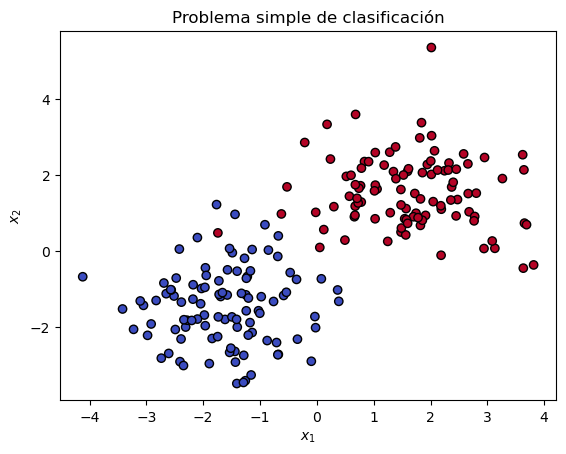

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(
    n_samples = 200, n_features = 2, 
    centers = [[-1.5,-1.5], [1.5,1.5]], random_state = 42
)

plt.scatter(
    x=X.T[0],
    y=X.T[1],
    c=y,
    cmap=plt.cm.coolwarm, 
    edgecolors='k'
)

plt.title("Problema simple de clasificación")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


El clasificador lineal que queremos entrenar, $h(\mathbf{x})$,  toma la siguiente forma:

$$
\begin{equation}
h_\mathbf{w}(\mathbf{x}) = w_1 x_1 + w_2 x_2,
\end{equation}
$$

el cual toma datos de entrenamiento $\mathbf{x} = [x_1, x_2]^T$. El clasificador lineal es parametrizado por pesos $\mathbf{w} = [w_1, w_2]^T$, los cuales tenemos que aprender usando los datos de entrenamiento. Con el objetivo de entrenar al clasificador, necesitamos definir una función de pérdida.

Para este problema, usamos una **pérdida cuadrática** (**squared loss**) para el clasificador $h_\mathbf{w}(\mathbf{x})$ sobre el conjunto de entrenamiento de $n$ muestras $\mathbf{x}_i = [x_1^i, x_2^i]^T$, $i=1, ..., n$, con sus respectivas etiquetas $y_i$.

$$
\begin{equation}
f_{loss}(w_1, w_2) = \frac{1}{2} \sum_{i=1}^n \left( y_i - h_\mathbf{w}(\mathbf{x}_i) \right)^2 = \frac{1}{2} \sum_{i=1}^n \left( y_i - w_1 x_1^i - w_2 x_2^i \right)^2 = \frac{1}{2} (\mathbf{y} - X\mathbf{w})^T (\mathbf{y} - X\mathbf{w}).
\end{equation}
$$

Podemos calcular el gradiente de esta función de pérdida con respecto a $w_1$ y $w_2$.

$$
\begin{equation}
g(w_1, w_2) = \left[ \begin{array}{c} 
    \frac{\partial f_{loss}(w_1, w_2)}{\partial w_1} \\ 
    \frac{\partial f_{loss}(w_1, w_2)}{\partial w_2} 
    \end{array} \right] 
    = \left[ \begin{array}{c} 
    - \sum_{i=1}^n \left( y_i - w_1 x_1 - w_2 x_2 \right) x_1\\ 
    - \sum_{i=1}^n \left( y_i - w_1 x_1 - w_2 x_2 \right) x_2 \end{array} \right]
    = -X^T (\mathbf{y} - X\mathbf{w})
\end{equation}
$$

En las dos ecuaciones anteriores, las expresiones del extremo derecho son las versiones vectorizadas de la función de pérdida, donde $X$ es la matriz de datos y $\mathbf{y}$ es el vector de etiquetas. La versión vectorizada es más compacta, más fácil y más eficiente de implementar ya que evita el ciclo for para la suma.

Responde los siguientes incisos:

* **a)** Define las funciones de pérdida y su gradiente en Python.
* **b)** Utiliza algún método de primer orden para obtener los pesos que minimizan la función de perdida, $\mathbf{w}^* = [w_1^*, w_2^*]^T$. Inicia la búsqueda en el punto $\mathbf{w} = [0.0, -0.99]^T$.
* **c)** Genera la frontera de decisión del clasificador.
* **d)** Cálcula el accuracy del modelo. Dado que el clasificador lineal $h_\mathbf{w}(\mathbf{x}) = w_1 x_1 + w_2 x_2,$ regresa valores de predicción reales, necesitamos convertirlos a 0 y 1. Para ello, asignamos la etiqueta $y_{pred} = 1$ a todas las predicciones positivas, mientras que para las predicciones negativas asignamos la etiqueta $y_{pred} = 0$.